<a href="https://colab.research.google.com/github/afiflh/Machine_Learning/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Pembelajaran Mesin

Nama : Afif Lukmanul hakim

Kelas : TI-3G

Nomor : 03

NIM : 2141720262

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Data Set Plat Nomor 1**

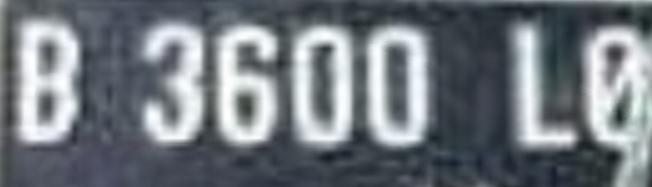

In [4]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/B3600LO.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [5]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

187
652
3


In [6]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(121924, 3)

In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

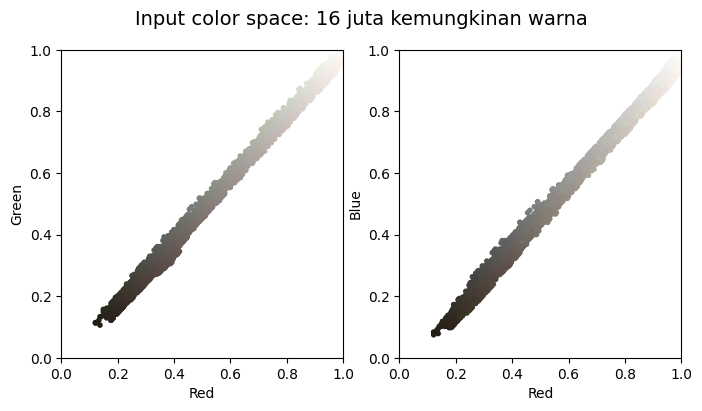

In [8]:
plot_pixels(data, title='Input color space: 16 juta kemungkinan warna')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


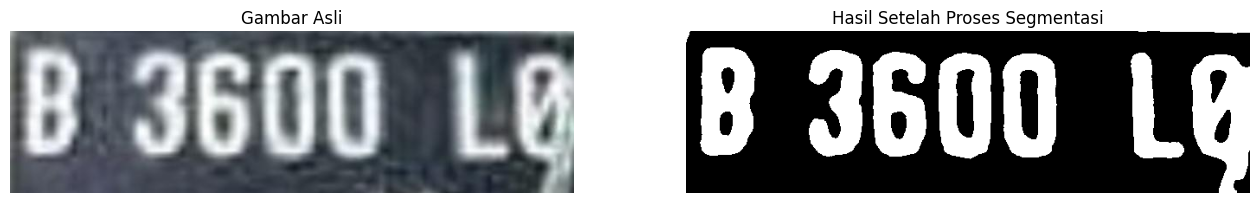

In [9]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

**Data Set Plat Nomor 2**

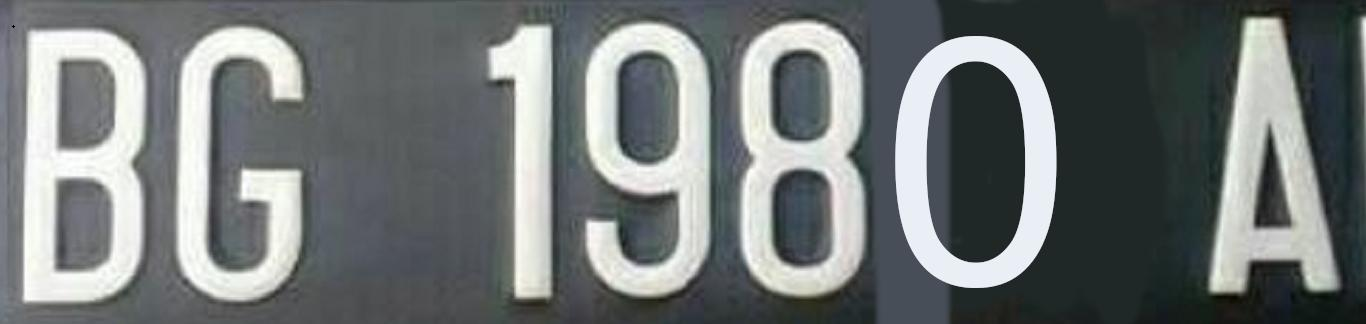

In [10]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/BG1980A.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2)

In [11]:
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

324
1366
3


In [12]:
data = img2 / 255.0
data2 = data.reshape(h * w, ch)
data2.shape

(442584, 3)

In [13]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data2

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data2.shape[0])[:N]
    colors = colors[i]
    R, G, B = data2[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

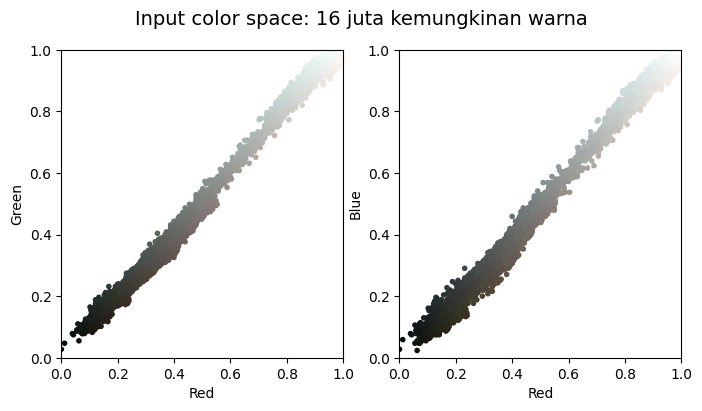

In [14]:
plot_pixels(data2, title='Input color space: 16 juta kemungkinan warna')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


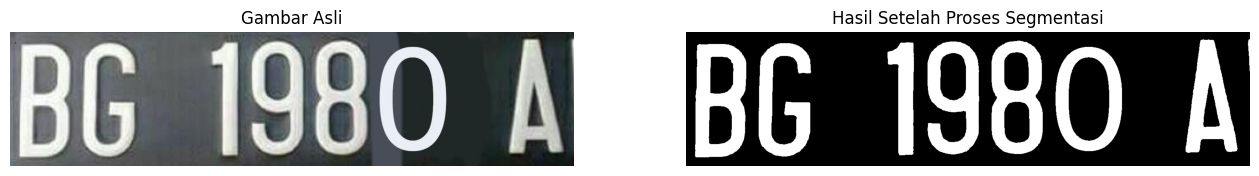

In [16]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data2)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

**Data Set Plat Nomor 3**

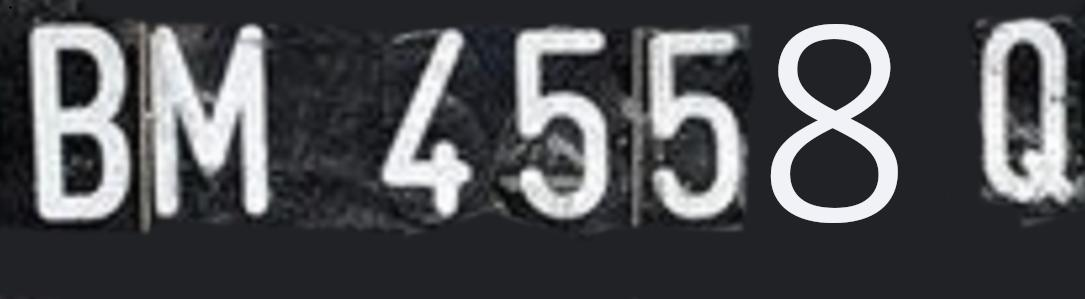

In [20]:
# Load Gambar
img3 = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/BM45558Q.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img3)

In [21]:
h, w, ch= img3.shape
print(h)
print(w)
print(ch)

299
1085
3


In [22]:
data = img3 / 255.0
data3 = data.reshape(h * w, ch)
data3.shape

(324415, 3)

In [25]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data3

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data3.shape[0])[:N]
    colors = colors[i]
    R, G, B = data3[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

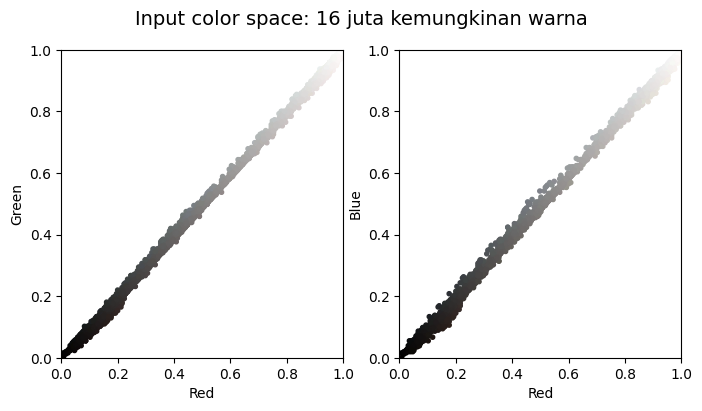

In [26]:
plot_pixels(data3, title='Input color space: 16 juta kemungkinan warna')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


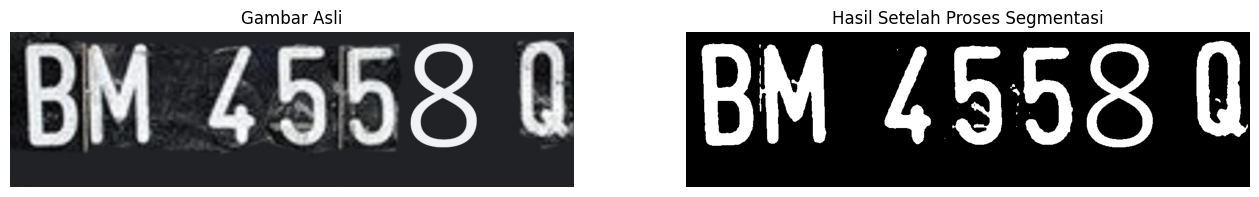

In [27]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data3)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

**Data Set Plat Nomor 4**

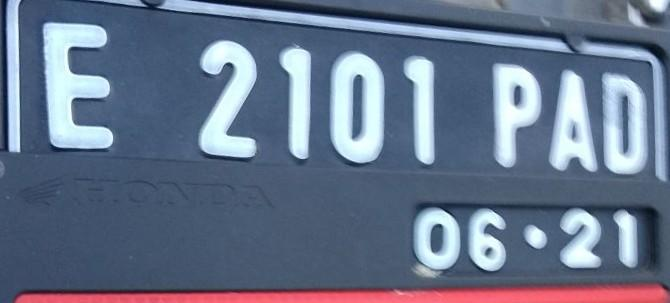

In [29]:
# Load Gambar
img4 = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/E-2101-PAD.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img4)

In [30]:
h, w, ch= img4.shape
print(h)
print(w)
print(ch)

303
670
3


In [31]:
data = img4 / 255.0
data4 = data.reshape(h * w, ch)
data4.shape

(203010, 3)

In [32]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data4

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data4.shape[0])[:N]
    colors = colors[i]
    R, G, B = data4[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

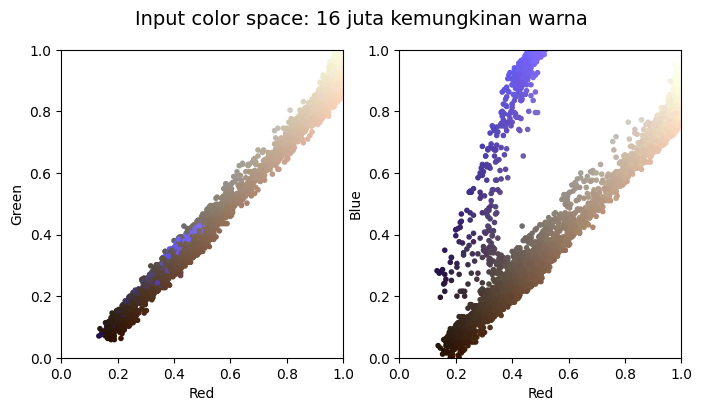

In [33]:
plot_pixels(data4, title='Input color space: 16 juta kemungkinan warna')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


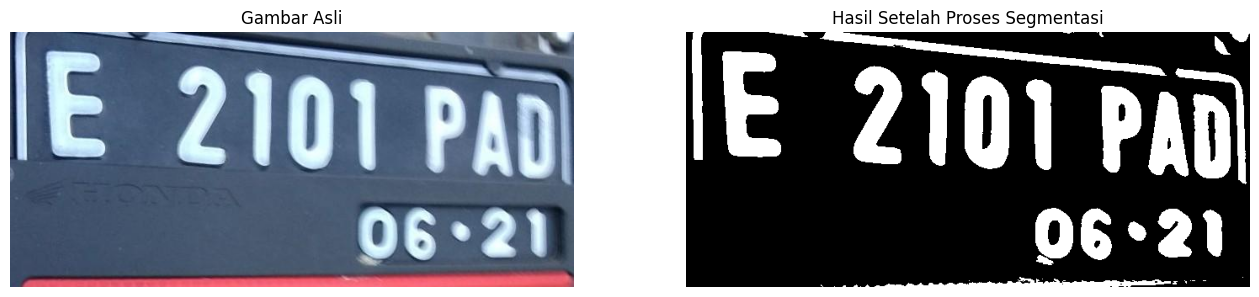

In [34]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data4)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

**Data Set Plat Nomor 5**

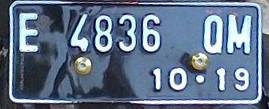

In [36]:
# Load Gambar
img5 = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/E-4836-QM.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img5)

In [37]:
h, w, ch= img5.shape
print(h)
print(w)
print(ch)

109
269
3


In [38]:
data = img5 / 255.0
data5 = data.reshape(h * w, ch)
data5.shape

(29321, 3)

In [39]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data5

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data5.shape[0])[:N]
    colors = colors[i]
    R, G, B = data5[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

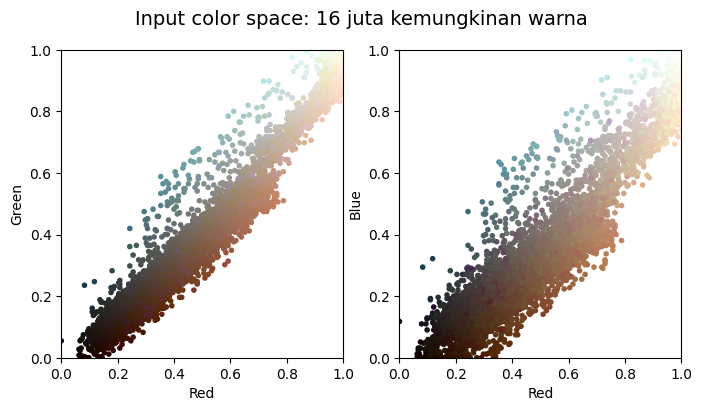

In [40]:
plot_pixels(data5, title='Input color space: 16 juta kemungkinan warna')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


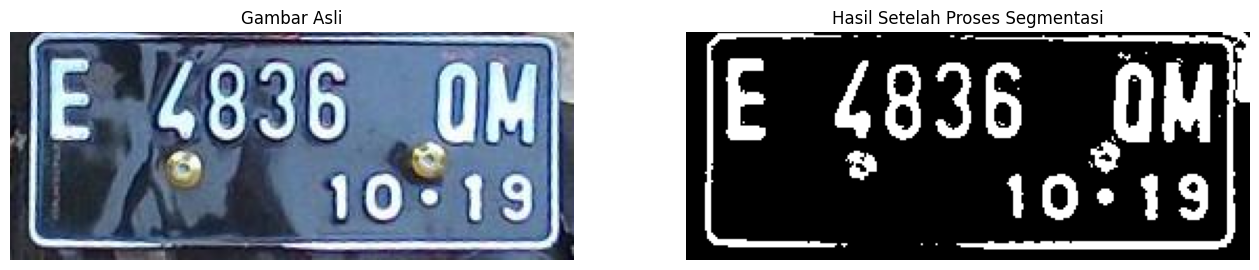

In [41]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data5)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()